Logistic Regression model on Middlebury-college-dataset(985*17)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:

midd_data = pd.read_csv("midd_survey.csv")

In [ ]:
midd_data.head()

,relationship,midd_find_relationship,midd_find_hookup,midd_goes_relationship,midd_goes_hookup,midd_lookingfor_relationship,midd_lookingfor_hookup,midd_opps_newpeople,mrtl_potential_date,find_partner,gender,gpa,class,siblings,parents_married,race,housing,year
0,0,4,5.0,5.0,2.0,2,4.0,3,2.0,None,Other,2.00,Lower Class,5,Yes,Hispanic/Latino,Dorm,First Year
1,0,3,4.0,4.0,3.0,2,1.0,4,2.0,Friends,Woman,2.16,Lower Class,1,Yes,White,Dorm,Sophomore
2,0,5,3.0,3.0,1.0,1,1.0,3,5.0,Friends,Woman,2.50,Lower Class,3,Yes,Asian/Asian American,Dorm,First Year
3,0,4,2.0,3.0,2.0,4,4.0,3,1.0,Family,Man,2.50,Upper Class,3,Yes,White,Dorm,Senior
4,0,2,5.0,5.0,3.0,5,4.0,3,2.0,Friends,Woman,2.50,Upper Middle Class,2,Yes,White,Dorm,First Year


In [ ]:
midd_data.describe()

,relationship,midd_find_relationship,midd_find_hookup,midd_goes_relationship,midd_goes_hookup,midd_lookingfor_relationship,midd_lookingfor_hookup,midd_opps_newpeople,mrtl_potential_date,gpa,siblings
count,985.000000,985.000000,984.000000,983.000000,980.000000,985.000000,976.000000,985.000000,981.000000,985.000000,985.000000
mean,0.300508,3.079188,4.036585,3.568667,3.467347,2.856853,2.571721,3.164467,2.316004,3.509472,1.549239
std,0.458712,1.083798,0.864516,1.080806,1.035605,1.314714,1.282217,1.102176,1.157072,0.301945,1.040766
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,0.000000,2.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,3.340000,1.000000
50%,0.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.550000,1.000000
75%,1.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.700000,2.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000


In [ ]:
midd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   relationship                  985 non-null    int64  
 1   midd_find_relationship        985 non-null    int64  
 2   midd_find_hookup              984 non-null    float64
 3   midd_goes_relationship        983 non-null    float64
 4   midd_goes_hookup              980 non-null    float64
 5   midd_lookingfor_relationship  985 non-null    int64  
 6   midd_lookingfor_hookup        976 non-null    float64
 7   midd_opps_newpeople           985 non-null    int64  
 8   mrtl_potential_date           981 non-null    float64
 9   find_partner                  985 non-null    object 
 10  gender                        985 non-null    object 
 11  gpa                           985 non-null    float64
 12  class                         985 non-null    object 
 13  sibli

In [ ]:
#Psuedo Categories -find_rel, find_hook, goes_rel, goes_hook,
# look_rel, look_hook, opps_new, pot_date, siblings
# categories - gender, class, year, housing, race, find_partner, pareents
# target(label) - relationship
#visualizing target using hues
midd_data["relationship"].value_counts()

0    689
1    296
Name: relationship, dtype: int64

<Axes: xlabel='relationship', ylabel='count'>

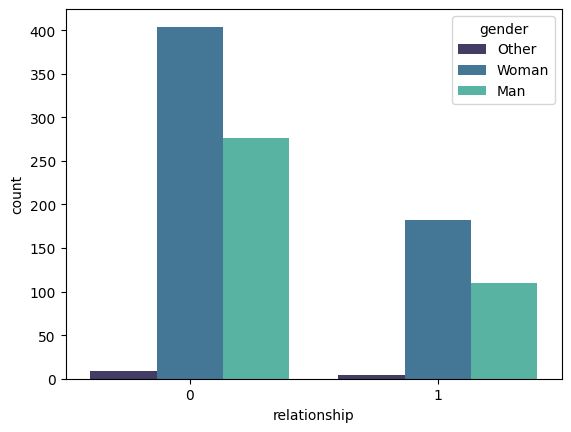

In [ ]:
sns.countplot(x="relationship", data=midd_data , hue="gender",palette="mako")
#more women not in relationship than men, same for in relationship

<Axes: xlabel='relationship', ylabel='count'>

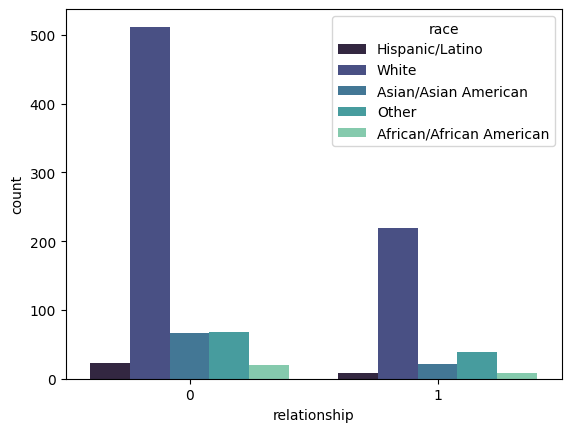

In [ ]:
sns.countplot(x="relationship",data=midd_data,hue="race",palette = "mako")
#most count:non-rel - white, rel - white

<Axes: xlabel='relationship', ylabel='count'>

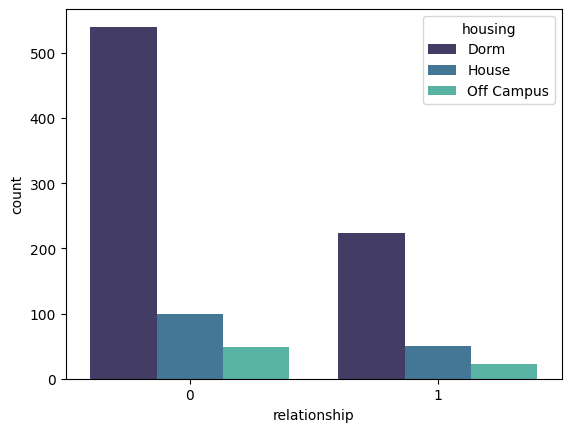

In [ ]:
sns.countplot(x="relationship",data=midd_data,hue="housing",palette="mako")
#most people not in R are from dorms,same with in R

<Axes: xlabel='relationship', ylabel='count'>

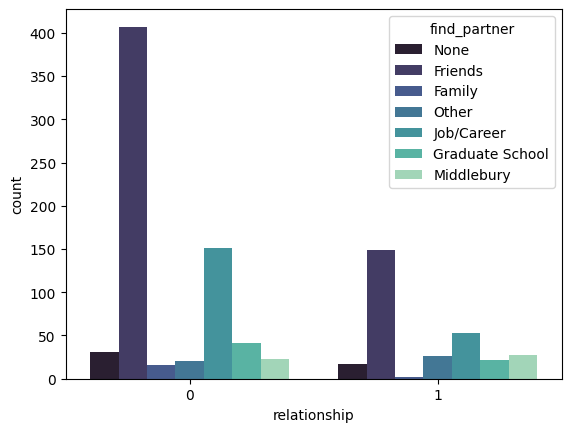

In [ ]:
sns.countplot(x="relationship",data=midd_data,hue="find_partner",palette="mako")

from analyzing we get - most people not in a relationship are white,women,hosuing in dorms and looking for partner in friends
same case for in relationship but numbers are smaller for this case

<Axes: xlabel='relationship', ylabel='count'>

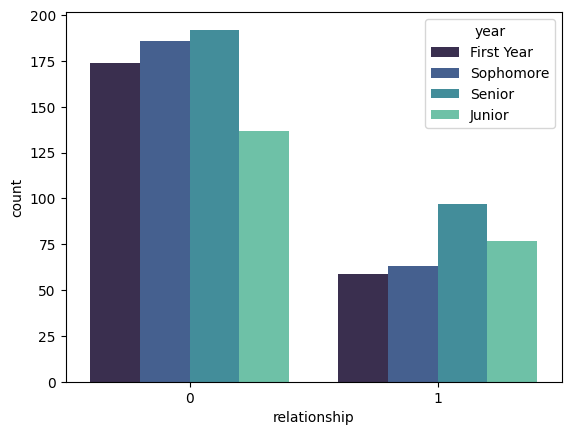

In [ ]:
sns.countplot(x="relationship",data=midd_data,hue="year",palette="mako")
#all year have almost equal people in relationship and not in relationship

<Axes: xlabel='relationship', ylabel='gpa'>

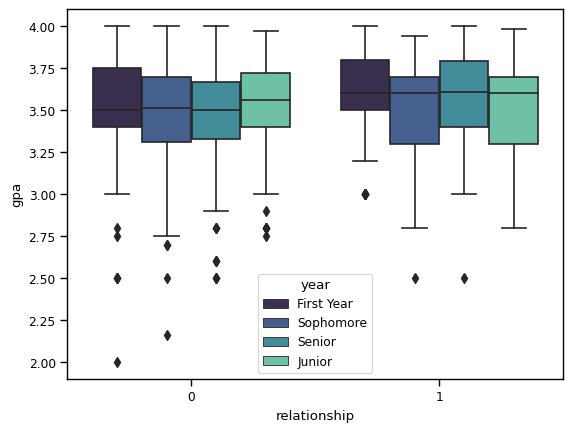

In [ ]:
#comparing target with gpa
sns.boxplot(x="relationship",y="gpa",data=midd_data,hue="year",palette="mako")
#for all year most students not in a Relationship gpa lies in 3-4
#similar for in reltionship but a bit higher starting point for 1st and 3rd

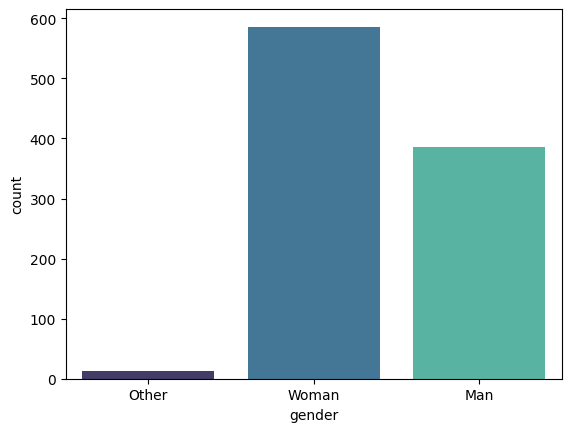

In [ ]:
#countplots for basic categories
sns.countplot(x="gender",data=midd_data,palette="mako")

<Axes: xlabel='race', ylabel='count'>

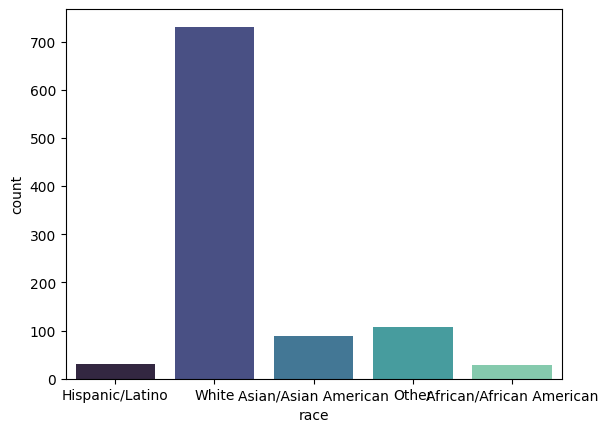

In [ ]:
sns.countplot(x="race",data=midd_data,palette="mako")

<Axes: xlabel='housing', ylabel='count'>

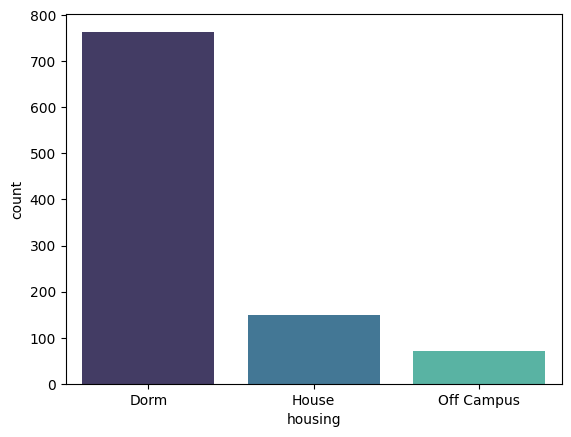

In [ ]:
sns.countplot(x="housing",data=midd_data,palette="mako")

<Axes: xlabel='midd_lookingfor_relationship', ylabel='count'>

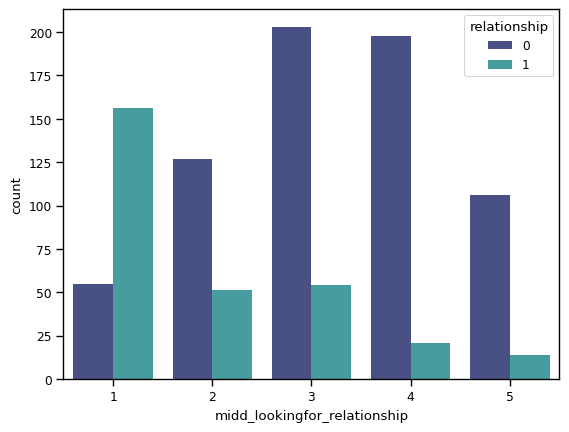

In [ ]:
sns.countplot(x="midd_lookingfor_relationship",data=midd_data,hue="relationship",palette="mako")
#people not a in relationship and neutral (3,4) on looking for a relationship are more in population

<Axes: xlabel='find_partner', ylabel='count'>

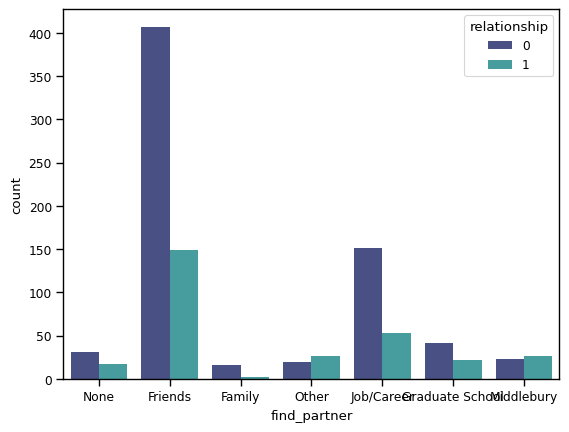

In [ ]:
sns.countplot(x="find_partner",data=midd_data,palette="mako",hue="relationship")

<Axes: xlabel='midd_opps_newpeople', ylabel='count'>

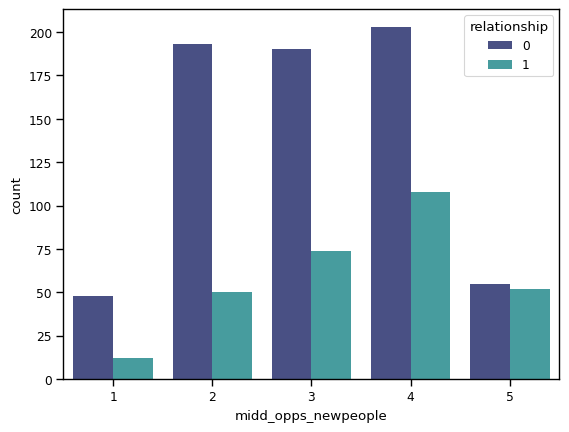

In [ ]:
sns.countplot(x="midd_opps_newpeople",data=midd_data,hue="relationship",palette="mako")
#oppurtinities opinion lies in(2-4) for non Relationship

In [ ]:
# data visualization done
# converting all category columns into dummy variables so that alogorithm can understand better
midd_data.columns

Index(['relationship', 'midd_find_relationship', 'midd_find_hookup',
       'midd_goes_relationship', 'midd_goes_hookup',
       'midd_lookingfor_relationship', 'midd_lookingfor_hookup',
       'midd_opps_newpeople', 'mrtl_potential_date', 'find_partner', 'gender',
       'gpa', 'class', 'siblings', 'parents_married', 'race', 'housing',
       'year'],
      dtype='object')

In [ ]:
find_r = pd.get_dummies(midd_data["midd_find_relationship"],drop_first=True)
find_h = pd.get_dummies(midd_data["midd_find_hookup"],drop_first=True)
goes_r = pd.get_dummies(midd_data["midd_goes_relationship"],drop_first=True)
goes_h = pd.get_dummies(midd_data["midd_goes_hookup"],drop_first=True)
look_r = pd.get_dummies(midd_data["midd_lookingfor_relationship"],drop_first=True)
look_h = pd.get_dummies(midd_data["midd_lookingfor_hookup"],drop_first=True)
opp_new = pd.get_dummies(midd_data["midd_opps_newpeople"],drop_first=True)
mrt_pot_date = pd.get_dummies(midd_data["mrtl_potential_date"],drop_first=True)
find_p = pd.get_dummies(midd_data["find_partner"],drop_first=True)
gndr = pd.get_dummies(midd_data["gender"],drop_first=True)
clss = pd.get_dummies(midd_data["class"],drop_first=True)
sib = pd.get_dummies(midd_data["siblings"],drop_first=True)
par_marr = pd.get_dummies(midd_data["parents_married"],drop_first=True)
rce = pd.get_dummies(midd_data["race"],drop_first=True)
house = pd.get_dummies(midd_data["housing"],drop_first=True)
yr = pd.get_dummies(midd_data["year"],drop_first=True)
#all categorical columns are converted into dummy
#first we drop the orignal categorical columns and then add dummy


In [ ]:
midd_data.drop(['midd_find_relationship', 'midd_find_hookup','midd_goes_relationship', 'midd_goes_hookup',
       'midd_lookingfor_relationship', 'midd_lookingfor_hookup','midd_opps_newpeople', 'mrtl_potential_date', 'find_partner', 'gender',
        'class', 'siblings', 'parents_married', 'race', 'housing','year'],axis=1,inplace=True)

In [ ]:
#adding dummies
midd_data = pd.concat([midd_data,find_r,find_h,goes_r,goes_h,look_r,look_h,opp_new,mrt_pot_date,find_p,gndr,clss,sib,par_marr,rce,house,yr],axis=1)

In [ ]:
#existing categorical columns removed
midd_data.columns

Index(['relationship', 'gpa', '2', '3', '4', '5', '2', '3', '4', '5', '2', '3',
       '4', '5', '2', '3', '4', '5', '2', '3', '4', '5', '2', '3', '4', '5',
       '2', '3', '4', '5', '2', '3', '4', '5', 'Friends', 'Graduate School',
       'Job/Career', 'Middlebury', 'None', 'Other', 'Other', 'Woman',
       'Middle Class', 'Upper Class', 'Upper Middle Class', '1', '2', '3', '4',
       '5', 'Yes', 'Asian/Asian American', 'Hispanic/Latino', 'Other', 'White',
       'House', 'Off Campus', 'Junior', 'Senior', 'Sophomore'],
      dtype='object')

In [ ]:
# column names cannot be numbers need to be a string
midd_data.rename(columns = { 2:"2",3:"3",4:"4",5:"5",2.0:"2",3.0:"3",4.0:"4",5.0:"5",1:"1"},inplace=True)

In [ ]:
#now all categories are converted to dummies and column names are strings its time to split data
X = midd_data.drop("relationship",axis=1)
#label
y = midd_data["relationship"]

In [69]:
#splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
#creating model
log_model = LogisticRegression()

In [71]:
#training model
log_model.fit(X_train,y_train)

LogisticRegression()

In [72]:
#testing
predictions = log_model.predict(X_test)

In [73]:
# now model is trained and tested, we use metrics to evaluate model performance
print(classification_report(y_test,predictions))
#model has 80% accuracy

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       210
           1       0.72      0.53      0.61        86

    accuracy                           0.80       296
   macro avg       0.77      0.72      0.74       296
weighted avg       0.80      0.80      0.79       296

